In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
df = pd.read_csv('/content/drive/MyDrive/data/busan/지역별_관광지_검색순위.csv')
df2 = pd.read_csv('/content/drive/MyDrive/data/busan/지역별_관광지_검색순위_식음료.csv')
df3 = pd.read_csv('/content/drive/MyDrive/data/busan/지역별_관광지_검색순위_숙박.csv')
df4 = pd.read_csv('/content/drive/MyDrive/data/busan/부산광역시_지역화폐(동백전) 가맹점 현황_20221222.csv', encoding = 'cp949')

# 중분류 카테고리 별 데이터 분류

In [ ]:
df_ct = df[df['중분류 카테고리'] == '문화관광']
df_ct

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
13,14,롯데월드어드벤처부산,부산광역시,기장군,부산 기장군 동부산관광로 42-0,문화관광,테마공원,"134,067"
27,28,BEXCO,부산광역시,해운대구,부산 해운대구 APEC로 55-0,문화관광,전시시설,"89,716"
30,31,벡스코제1전시장,부산광역시,해운대구,부산 해운대구 APEC로 55-0,문화관광,전시시설,"87,725"
35,36,부산시민공원,부산광역시,부산진구,부산 부산진구 시민공원로 73-0,문화관광,도시공원,"78,895"
46,47,사직야구장,부산광역시,동래구,부산 동래구 사직로 45-0,문화관광,레저스포츠시설,"70,133"
...,...,...,...,...,...,...,...,...
491,492,75광장,부산광역시,영도구,부산 영도구,문화관광,도시공원,"2,060"
494,495,조은극장1관,부산광역시,중구,부산 중구 구덕로34번길 4-0,문화관광,공연시설,"2,040"
495,496,메가박스해운대,부산광역시,해운대구,부산 해운대구 해운대로 813-0,문화관광,공연시설,"2,033"
497,498,메가박스부산대,부산광역시,금정구,부산 금정구 장전로12번길 55-0,문화관광,공연시설,"2,029"


In [ ]:
df_shop = df[df['중분류 카테고리'] == '쇼핑']
df_shop

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,신세계백화점센텀시티점,부산광역시,해운대구,부산 해운대구 센텀남대로 35-0,쇼핑,백화점,"559,499"
2,3,롯데백화점부산본점,부산광역시,부산진구,부산 부산진구 가야대로 772-0,쇼핑,백화점,"381,864"
6,7,코스트코홀세일부산점,부산광역시,수영구,부산 수영구 구락로 137-0,쇼핑,대형마트,"260,036"
9,10,롯데백화점광복점,부산광역시,중구,부산 중구 중앙대로 2-0,쇼핑,백화점,"172,097"
10,11,롯데프리미엄아울렛동부산점,부산광역시,기장군,부산 기장군 기장해안로 147-0,쇼핑,쇼핑몰,"152,655"
...,...,...,...,...,...,...,...,...
470,471,다이소부산화명2호점,부산광역시,북구,부산 북구 금곡대로 208-0,쇼핑,대형마트,"2,240"
475,476,반여3동 골목시장,부산광역시,해운대구,부산 해운대구 재반로270번길 43-53,쇼핑,시장,"2,179"
492,493,광장아울렛,부산광역시,기장군,부산 기장군 정관7로 3-0,쇼핑,대형마트,"2,059"
493,494,보수동책방골목,부산광역시,중구,부산 중구,쇼핑,기타쇼핑시설,"2,041"


In [ ]:
df_nt = df[df['중분류 카테고리'] == '자연관광']
df_nt

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
4,5,광안리해수욕장,부산광역시,수영구,부산 수영구 광안해변로 219-0,자연관광,자연경관(하천/해양),"261,818"
5,6,해운대해수욕장,부산광역시,해운대구,부산 해운대구 해운대해변로 264-0,자연관광,자연경관(하천/해양),"261,722"
7,8,송정해수욕장,부산광역시,해운대구,부산 해운대구 송정해변로 62-0,자연관광,자연경관(하천/해양),"244,851"
12,13,다대포해수욕장,부산광역시,사하구,부산 사하구 몰운대1길 14-0,자연관광,자연경관(하천/해양),"144,834"
17,18,송도해수욕장,부산광역시,서구,부산 서구,자연관광,자연경관(하천/해양),"119,540"
...,...,...,...,...,...,...,...,...
457,458,동명부두,부산광역시,남구,부산 남구 북항로 17-0,자연관광,자연경관(하천/해양),"2,355"
467,468,다대포항,부산광역시,사하구,부산 사하구,자연관광,자연경관(하천/해양),"2,257"
471,472,신감만부두,부산광역시,남구,부산 남구,자연관광,자연경관(하천/해양),"2,232"
474,475,대항선착장,부산광역시,강서구,부산 강서구 가덕해안로 0-0,자연관광,자연경관(하천/해양),"2,216"


In [ ]:
df_etc = df[df['중분류 카테고리'] == '기타관광']
df_etc

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
1,2,김해공항국내선청사,부산광역시,강서구,부산 강서구 공항진입로 108-0,기타관광,교통시설,"446,879"
3,4,김해국제공항,부산광역시,강서구,부산 강서구 공항진입로 108-0,기타관광,교통시설,"321,903"
36,37,해운대블루라인파크미포정거장,부산광역시,해운대구,부산 해운대구 달맞이길62번길 13-0,기타관광,기타관광,"78,421"
47,48,기장해녀촌,부산광역시,기장군,부산 기장군 연화1길 184-0,기타관광,기타관광,"64,940"
52,53,송도해상케이블카,부산광역시,서구,부산 서구 송도해변로 171-0,기타관광,기타관광,"58,215"
57,58,흰여울문화마을,부산광역시,영도구,부산 영도구,기타관광,기타관광,"55,152"
58,59,부산서부버스터미널,부산광역시,사상구,부산 사상구 사상로 201-0,기타관광,교통시설,"54,181"
64,65,해운대달맞이길,부산광역시,해운대구,부산 해운대구 달맞이길 0-0,기타관광,데이트코스,"50,855"
71,72,부산종합버스터미널,부산광역시,금정구,부산 금정구 중앙대로 2238-0,기타관광,교통시설,"47,462"
74,75,부산역,부산광역시,동구,부산 동구 중앙대로 206-0,기타관광,교통시설,"45,138"


In [ ]:
df_sport = df[df['중분류 카테고리'] == '레저스포츠']
df_sport

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
55,56,부산요트경기장,부산광역시,해운대구,부산 해운대구 해운대해변로 84-0,레저스포츠,수상레저스포츠,"56,185"
56,57,렛츠런파크부산경남,부산광역시,강서구,부산 강서구 가락대로 929-0,레저스포츠,육상레저스포츠,"55,969"
66,67,해운대CC,부산광역시,기장군,부산 기장군 병산2로 265-0,레저스포츠,육상레저스포츠,"50,246"
84,85,해운대비치골프앤리조트,부산광역시,기장군,부산 기장군 대변로 74-0,레저스포츠,육상레저스포츠,"40,325"
91,92,베이사이드GC,부산광역시,기장군,부산 기장군 이천8길 100-0,레저스포츠,육상레저스포츠,"37,081"
94,95,스톤게이트CC,부산광역시,기장군,부산 기장군 곡천길 317-0,레저스포츠,육상레저스포츠,"36,612"
96,97,아시아드컨트리클럽,부산광역시,기장군,부산 기장군 차양길 26-0,레저스포츠,육상레저스포츠,"35,804"
116,117,부산CC,부산광역시,금정구,부산 금정구 중앙대로2327번길 112-0,레저스포츠,육상레저스포츠,"26,867"
133,134,동래베네스트GC,부산광역시,금정구,부산 금정구,레저스포츠,육상레저스포츠,"20,797"
141,142,기장동원로얄컨트리클럽,부산광역시,기장군,부산 기장군 반송로 1345-0,레저스포츠,육상레저스포츠,"19,434"


In [ ]:
df_ht = df[df['중분류 카테고리'] == '역사관광']
df_ht

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
8,9,해동용궁사,부산광역시,기장군,부산 기장군 용궁길 86-0,역사관광,종교성지,"199,253"
16,17,태종대,부산광역시,영도구,부산 영도구 전망로 24-0,역사관광,역사유적지,"121,311"
41,42,범어사,부산광역시,금정구,부산 금정구 범어사로 250-0,역사관광,종교성지,"73,779"
78,79,장안사,부산광역시,기장군,부산 기장군 장안로 482-0,역사관광,종교성지,"43,401"
131,132,삼광사,부산광역시,부산진구,부산 부산진구 초읍천로43번길 77-0,역사관광,종교성지,"21,066"
186,187,충렬사,부산광역시,동래구,부산 동래구 충렬대로 345-0,역사관광,역사유적지,"13,143"
191,192,홍법사,부산광역시,금정구,부산 금정구 두구로33번길 202-0,역사관광,종교성지,"12,398"
193,194,해광사,부산광역시,기장군,부산 기장군 기장해안로 340-0,역사관광,종교성지,"12,275"
200,201,선암사,부산광역시,부산진구,부산 부산진구 백양산로 138-0,역사관광,종교성지,"11,794"
265,266,해운정사,부산광역시,해운대구,부산 해운대구 우동2로 40-6,역사관광,종교성지,"6,921"


In [ ]:
df2

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,칠암사계,부산광역시,기장군,부산 기장군 칠암1길 7-10,음식,카페/찻집,"100,578"
1,2,웨이브온커피,부산광역시,기장군,부산 기장군 해맞이로 286-0,음식,카페/찻집,"66,691"
2,3,피아크카페앤베이커리,부산광역시,영도구,부산 영도구 해양로195번길 180-0,음식,카페/찻집,"60,904"
3,4,해운대암소갈비집,부산광역시,해운대구,부산 해운대구 중동2로10번길 32-10,음식,한식,"50,002"
4,5,합천일류돼지국밥,부산광역시,사상구,부산 사상구 광장로 34-0,음식,한식,"35,188"
...,...,...,...,...,...,...,...,...
495,496,하동집,부산광역시,금정구,부산 금정구 오륜대로 258-0,음식,전문음식,"3,774"
496,497,맛찬들왕소금구이대연동직영점,부산광역시,남구,부산 남구 유엔평화로 36-0,음식,한식,"3,762"
497,498,탐앤탐스블랙달맞이점,부산광역시,해운대구,부산 해운대구 달맞이길 213-0,음식,카페/찻집,"3,761"
498,499,버거샵,부산광역시,해운대구,부산 해운대구 우동1로20번길 19-0,음식,간이음식,"3,749"


In [ ]:
df3

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,아난티힐튼부산,부산광역시,기장군,부산 기장군 기장해안로 268-32,숙박,호텔,"152,941"
1,2,파라다이스호텔부산,부산광역시,해운대구,부산 해운대구 해운대해변로 296-0,숙박,호텔,"111,872"
2,3,한화리조트해운대,부산광역시,해운대구,부산 해운대구 마린시티3로 52-0,숙박,콘도미니엄,"103,401"
3,4,웨스틴조선호텔부산,부산광역시,해운대구,부산 해운대구 동백로 67-0,숙박,호텔,"62,558"
4,5,롯데호텔부산점,부산광역시,부산진구,부산 부산진구 가야대로 772-0,숙박,호텔,"60,070"
...,...,...,...,...,...,...,...,...
495,496,하운드호텔정관점,부산광역시,기장군,부산 기장군 산단1로 98-11,숙박,호텔,983
496,497,모모쥬스,부산광역시,해운대구,부산 해운대구 해운대해변로209번길 12-0,숙박,모텔,978
497,497,아이유모텔,부산광역시,연제구,부산 연제구 월드컵대로99번길 31-0,숙박,모텔,978
498,499,제이모텔,부산광역시,사상구,부산 사상구 대동로 297-0,숙박,모텔,976


In [ ]:
df4

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자
0,1,고봉민김밥인,부산 영도구 와치로 250 (동삼동) 1층,NaN,35.075315,129.068770,2022-12-22
1,2,미사랑스킨앤바디,"부산 사하구 승학로224번길 10 ,1층(괴정동)",NaN,35.101239,128.990313,2022-12-22
2,3,피자스쿨 부산재송점,부산 해운대구 재반로 182 비둘기맨션상가 B동 가호 (재송동),NaN,35.193467,129.130557,2022-12-22
3,4,미스터피자아시아드2호점,"부산 연제구 월드컵대로 232 2층 (거제동,거벌빌등)",NaN,35.189890,129.071940,2022-12-22
4,5,성원칼국수,부산 부산진구 냉정로 220-1 (개금동),NaN,35.150897,129.023928,2022-12-22
...,...,...,...,...,...,...,...
126936,126937,행복한 정쌤 공부방,"부산 강서구 명지오션시티11로 22, 102동 203호 (명지동,명지두산위브포세이돈)",NaN,35.083390,128.896842,2022-12-22
126937,126938,행복홈케어,"부산 사하구 서포로30번길 12 207동 301호 (구평동,e편한세상아파트)",NaN,35.081755,128.985395,2022-12-22
126938,126939,현대표구사,부산 중구 중앙대로 137-1 (대창동2가),NaN,35.109934,129.037028,2022-12-22
126939,126940,현혜반점,NaN,"부산 사상구 덕포동 404-7,8",NaN,NaN,2022-12-22


In [ ]:
df_et = df[df['중분류 카테고리'] == '체험관광']
df_et

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
53,54,허심청,부산광역시,동래구,부산 동래구 온천장로107번길 32-0,체험관광,웰니스관광,"57,842"
205,206,센텀시티스파랜드,부산광역시,해운대구,부산 해운대구 센텀남대로 35-0,체험관광,웰니스관광,"11,326"
237,238,해운대온천센터,부산광역시,해운대구,부산 해운대구 중동2로 16-0,체험관광,웰니스관광,"8,554"
262,263,정관온천,부산광역시,기장군,부산 기장군 정관8로 16-5,체험관광,웰니스관광,"7,210"
325,326,태종대온천,부산광역시,영도구,부산 영도구 태종로 808-0,체험관광,웰니스관광,"4,664"
403,404,카덴96,부산광역시,기장군,부산 기장군 기장대로 1075-3,체험관광,웰니스관광,"3,050"
410,410,금정산부곡온천,부산광역시,금정구,부산 금정구 수림로20번길 36-0,체험관광,웰니스관광,"2,889"
414,415,공수어촌체험마을,부산광역시,기장군,부산 기장군 공수해안길 13-2,체험관광,농/산/어촌체험,"2,868"
488,489,라이프온천,부산광역시,기장군,부산 기장군 반송로 1650-0,체험관광,웰니스관광,"2,073"


In [ ]:
df4[df4['가맹점명'].str.contains('허심청')]

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자
37241,37242,하삼동커피 허심청점,부산 동래구 온천장로 81-1 1층 (온천동),NaN,35.218633,129.082270,2022-12-22
68716,68717,메가커피 허심청점,부산 동래구 온천장로 125 (온천동),NaN,35.221874,129.084784,2022-12-22


In [ ]:
df4[df4['가맹점명'].str.contains('해운대해수욕장')]

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자
44749,44750,다비치안경해운대해수욕장입구점,부산 해운대구 구남로 11-1 (우동),NaN,35.162876,129.159814,2022-12-22


In [ ]:
df4[df4['가맹점명'].str.contains('정관온천')]

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자
56883,56884,정관온천주식회사,"부산 기장군 정관면 정관 8 로 16-5, ( 매학리 , 정관온천 )",NaN,35.332765,129.17678,2022-12-22


# 2/7 분석

In [ ]:
result1 = pd.concat([df, df2])
result2 = pd.concat([result1, df3])
result2

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,신세계백화점센텀시티점,부산광역시,해운대구,부산 해운대구 센텀남대로 35-0,쇼핑,백화점,"559,499"
1,2,김해공항국내선청사,부산광역시,강서구,부산 강서구 공항진입로 108-0,기타관광,교통시설,"446,879"
2,3,롯데백화점부산본점,부산광역시,부산진구,부산 부산진구 가야대로 772-0,쇼핑,백화점,"381,864"
3,4,김해국제공항,부산광역시,강서구,부산 강서구 공항진입로 108-0,기타관광,교통시설,"321,903"
4,5,광안리해수욕장,부산광역시,수영구,부산 수영구 광안해변로 219-0,자연관광,자연경관(하천/해양),"261,818"
...,...,...,...,...,...,...,...,...
495,496,하운드호텔정관점,부산광역시,기장군,부산 기장군 산단1로 98-11,숙박,호텔,983
496,497,모모쥬스,부산광역시,해운대구,부산 해운대구 해운대해변로209번길 12-0,숙박,모텔,978
497,497,아이유모텔,부산광역시,연제구,부산 연제구 월드컵대로99번길 31-0,숙박,모텔,978
498,499,제이모텔,부산광역시,사상구,부산 사상구 대동로 297-0,숙박,모텔,976


In [ ]:
result2['검색건수'] = result2['검색건수'].str.replace(',','')
result2['검색건수'] = result2['검색건수'].astype('int')
df_new = result2.sort_values(by='검색건수',ascending = False)
df_new.head(50)

In [ ]:
df_new = result2.sort_values(by='검색건수',ascending = False)
df_new.head(50)

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,신세계백화점센텀시티점,부산광역시,해운대구,부산 해운대구 센텀남대로 35-0,쇼핑,백화점,559499
1,2,김해공항국내선청사,부산광역시,강서구,부산 강서구 공항진입로 108-0,기타관광,교통시설,446879
2,3,롯데백화점부산본점,부산광역시,부산진구,부산 부산진구 가야대로 772-0,쇼핑,백화점,381864
3,4,김해국제공항,부산광역시,강서구,부산 강서구 공항진입로 108-0,기타관광,교통시설,321903
4,5,광안리해수욕장,부산광역시,수영구,부산 수영구 광안해변로 219-0,자연관광,자연경관(하천/해양),261818
5,6,해운대해수욕장,부산광역시,해운대구,부산 해운대구 해운대해변로 264-0,자연관광,자연경관(하천/해양),261722
6,7,코스트코홀세일부산점,부산광역시,수영구,부산 수영구 구락로 137-0,쇼핑,대형마트,260036
7,8,송정해수욕장,부산광역시,해운대구,부산 해운대구 송정해변로 62-0,자연관광,자연경관(하천/해양),244851
8,9,해동용궁사,부산광역시,기장군,부산 기장군 용궁길 86-0,역사관광,종교성지,199253
9,10,롯데백화점광복점,부산광역시,중구,부산 중구 중앙대로 2-0,쇼핑,백화점,172097


In [ ]:
df_new['검색건수'].describe()

count      1500.000000
mean      13113.522000
std       32055.719468
min         971.000000
25%        2745.750000
50%        5045.500000
75%       10157.000000
max      559499.000000
Name: 검색건수, dtype: float64

In [ ]:
df_new['중분류 카테고리'].value_counts()

숙박       500
음식       500
문화관광     183
쇼핑       146
자연관광      62
기타관광      40
레저스포츠     31
역사관광      29
체험관광       9
Name: 중분류 카테고리, dtype: int64

In [ ]:
df_many = df_new[df_new['검색건수'] >= 13113]
df_many

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,신세계백화점센텀시티점,부산광역시,해운대구,부산 해운대구 센텀남대로 35-0,쇼핑,백화점,559499
1,2,김해공항국내선청사,부산광역시,강서구,부산 강서구 공항진입로 108-0,기타관광,교통시설,446879
2,3,롯데백화점부산본점,부산광역시,부산진구,부산 부산진구 가야대로 772-0,쇼핑,백화점,381864
3,4,김해국제공항,부산광역시,강서구,부산 강서구 공항진입로 108-0,기타관광,교통시설,321903
4,5,광안리해수욕장,부산광역시,수영구,부산 수영구 광안해변로 219-0,자연관광,자연경관(하천/해양),261818
...,...,...,...,...,...,...,...,...
58,59,더스타뷔페,부산광역시,부산진구,부산 부산진구 중앙대로666번길 50-0,음식,전문음식,13254
59,60,스타벅스기장역DT점,부산광역시,기장군,부산 기장군 기장대로 527-0,음식,카페/찻집,13221
60,61,스타벅스을숙도강변DT점,부산광역시,사하구,부산 사하구 하신번영로 381-6,음식,카페/찻집,13209
61,62,타이빈,부산광역시,동래구,부산 동래구 금강로73번길 12-0,음식,외국식,13144


In [ ]:
df_many['검색건수'].groupby(df_many['시/군/구']).mean().sort_values(ascending=False)

시/군/구
연제구     68619.200000
강서구     61573.500000
수영구     56236.642857
해운대구    53420.333333
중구      52833.545455
부산진구    49927.000000
서구      49440.800000
기장군     46749.941176
동래구     44214.818182
사상구     44200.100000
금정구     42492.222222
영도구     37974.818182
동구      36386.100000
사하구     36268.500000
남구      33885.533333
북구      31393.125000
Name: 검색건수, dtype: float64

In [ ]:
df_many['중분류 카테고리'].value_counts()

쇼핑       80
음식       62
문화관광     54
숙박       37
자연관광     18
기타관광     17
레저스포츠    11
역사관광      6
체험관광      1
Name: 중분류 카테고리, dtype: int64

In [ ]:
df_many[df_many['중분류 카테고리'] == '숙박']['소분류 카테고리'].value_counts()

호텔       33
콘도미니엄     2
캠핑        1
호스텔       1
Name: 소분류 카테고리, dtype: int64

In [ ]:
df4['도로명'] = df4['도로명'].fillna(df4['지번'])
df4

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자,도로명주소
0,1,고봉민김밥인,부산 영도구 와치로 250 (동삼동) 1층,NaN,35.075315,129.068770,2022-12-22,NaN
1,2,미사랑스킨앤바디,"부산 사하구 승학로224번길 10 ,1층(괴정동)",NaN,35.101239,128.990313,2022-12-22,NaN
2,3,피자스쿨 부산재송점,부산 해운대구 재반로 182 비둘기맨션상가 B동 가호 (재송동),NaN,35.193467,129.130557,2022-12-22,NaN
3,4,미스터피자아시아드2호점,"부산 연제구 월드컵대로 232 2층 (거제동,거벌빌등)",NaN,35.189890,129.071940,2022-12-22,NaN
4,5,성원칼국수,부산 부산진구 냉정로 220-1 (개금동),NaN,35.150897,129.023928,2022-12-22,NaN
...,...,...,...,...,...,...,...,...
126936,126937,행복한 정쌤 공부방,"부산 강서구 명지오션시티11로 22, 102동 203호 (명지동,명지두산위브포세이돈)",NaN,35.083390,128.896842,2022-12-22,NaN
126937,126938,행복홈케어,"부산 사하구 서포로30번길 12 207동 301호 (구평동,e편한세상아파트)",NaN,35.081755,128.985395,2022-12-22,NaN
126938,126939,현대표구사,부산 중구 중앙대로 137-1 (대창동2가),NaN,35.109934,129.037028,2022-12-22,NaN
126939,126940,현혜반점,"부산 사상구 덕포동 404-7,8","부산 사상구 덕포동 404-7,8",NaN,NaN,2022-12-22,NaN


In [ ]:
df4_swim = df4[df4['도로명'].str.contains('수영구')]
df4_swim[df4_swim['도로명'].str.contains('광안해변로 219')]

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자,도로명주소
126006,126007,(주)2022부산기념품10선협의회 여가 거가 광,부산 수영구 광안해변로 219 1층 (광안동),NaN,35.153774,129.118516,2022-12-22,NaN


In [ ]:
df_many['시/군/구'].value_counts()

해운대구    66
기장군     51
강서구     24
부산진구    24
남구      15
수영구     14
사하구     12
중구      11
영도구     11
동래구     11
사상구     10
동구      10
금정구      9
북구       8
연제구      5
서구       5
Name: 시/군/구, dtype: int64

In [ ]:
df_many[df_many['관광지명'].str.contains('송도')]

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
17,18,송도해수욕장,부산광역시,서구,부산 서구,자연관광,자연경관(하천/해양),119540
52,53,송도해상케이블카,부산광역시,서구,부산 서구 송도해변로 171-0,기타관광,기타관광,58215
24,25,베스트웨스턴플러스부산송도호텔,부산광역시,서구,부산 서구 송도해변로 97-0,숙박,호텔,19157


# api

In [ ]:
import requests

url = 'http://apis.data.go.kr/6260000/BusanTourStaticService2/getVisitorStatInfo2'
params ={'serviceKey' : '0GFThSrrIYeZWEGew0ybzsOdq6pANbVrZE9nAcjjrqO4hpPyF4/HS5MaRgb83oizsBHn7hY5ek8MYcL52KwIUA==', 'numOfRows' : '10', 'pageNo' : '1', 'resultType' : 'xml' }

response = requests.get(url, params=params).text
response

'<?xml version="1.0" encoding="UTF-8"?><response>\n  <header>\n    <resultMsg>NORMAL_CODE</resultMsg>\n    <resultCode>00</resultCode>\n  </header>\n  <body>\n    <items>\n      <item>\n        <car>118393204</car>\n        <grocery>460363898</grocery>\n        <provincejeju>37449</provincejeju>\n        <provincedaegu>157822</provincedaegu>\n        <provincejeonbuk>33842</provincejeonbuk>\n        <clothing>2586385764</clothing>\n        <sports>1879219481</sports>\n        <provincegyeongbuk>102721</provincegyeongbuk>\n        <provinceincheon>93496</provinceincheon>\n        <travel>149356280</travel>\n        <beauty>921787813</beauty>\n        <online>25677805</online>\n        <spot>BIFF광장·용두산공원,보수동책방골목</spot>\n        <agethirties>383953</agethirties>\n        <provincegyeongnam>345244</provincegyeongnam>\n        <medical>958692434</medical>\n        <provincechungbuk>32664</provincechungbuk>\n        <agesixties>299052</agesixties>\n        <agetwenties>400169</agetwenties>\n

# 2/9

In [5]:
df4['도로명'] = df4['도로명'].fillna(df4['지번'])
df4

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자
0,1,고봉민김밥인,부산 영도구 와치로 250 (동삼동) 1층,NaN,35.075315,129.068770,2022-12-22
1,2,미사랑스킨앤바디,"부산 사하구 승학로224번길 10 ,1층(괴정동)",NaN,35.101239,128.990313,2022-12-22
2,3,피자스쿨 부산재송점,부산 해운대구 재반로 182 비둘기맨션상가 B동 가호 (재송동),NaN,35.193467,129.130557,2022-12-22
3,4,미스터피자아시아드2호점,"부산 연제구 월드컵대로 232 2층 (거제동,거벌빌등)",NaN,35.189890,129.071940,2022-12-22
4,5,성원칼국수,부산 부산진구 냉정로 220-1 (개금동),NaN,35.150897,129.023928,2022-12-22
...,...,...,...,...,...,...,...
126936,126937,행복한 정쌤 공부방,"부산 강서구 명지오션시티11로 22, 102동 203호 (명지동,명지두산위브포세이돈)",NaN,35.083390,128.896842,2022-12-22
126937,126938,행복홈케어,"부산 사하구 서포로30번길 12 207동 301호 (구평동,e편한세상아파트)",NaN,35.081755,128.985395,2022-12-22
126938,126939,현대표구사,부산 중구 중앙대로 137-1 (대창동2가),NaN,35.109934,129.037028,2022-12-22
126939,126940,현혜반점,"부산 사상구 덕포동 404-7,8","부산 사상구 덕포동 404-7,8",NaN,NaN,2022-12-22


In [34]:
result1 = pd.concat([df, df2])
result2 = pd.concat([result1, df3])
result2

result2['검색건수'] = result2['검색건수'].str.replace(',','')
result2['검색건수'] = result2['검색건수'].astype('int')
df_new = result2.sort_values(by='검색건수',ascending = False)
df_new.head(50)

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,신세계백화점센텀시티점,부산광역시,해운대구,부산 해운대구 센텀남대로 35-0,쇼핑,백화점,559499
1,2,김해공항국내선청사,부산광역시,강서구,부산 강서구 공항진입로 108-0,기타관광,교통시설,446879
2,3,롯데백화점부산본점,부산광역시,부산진구,부산 부산진구 가야대로 772-0,쇼핑,백화점,381864
3,4,김해국제공항,부산광역시,강서구,부산 강서구 공항진입로 108-0,기타관광,교통시설,321903
4,5,광안리해수욕장,부산광역시,수영구,부산 수영구 광안해변로 219-0,자연관광,자연경관(하천/해양),261818
5,6,해운대해수욕장,부산광역시,해운대구,부산 해운대구 해운대해변로 264-0,자연관광,자연경관(하천/해양),261722
6,7,코스트코홀세일부산점,부산광역시,수영구,부산 수영구 구락로 137-0,쇼핑,대형마트,260036
7,8,송정해수욕장,부산광역시,해운대구,부산 해운대구 송정해변로 62-0,자연관광,자연경관(하천/해양),244851
8,9,해동용궁사,부산광역시,기장군,부산 기장군 용궁길 86-0,역사관광,종교성지,199253
9,10,롯데백화점광복점,부산광역시,중구,부산 중구 중앙대로 2-0,쇼핑,백화점,172097


In [35]:
df_new[df_new['도로명주소'].str.contains('광안해변로')]

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
4,5,광안리해수욕장,부산광역시,수영구,부산 수영구 광안해변로 219-0,자연관광,자연경관(하천/해양),261818
5,6,수변최고돼지국밥민락본점,부산광역시,수영구,부산 수영구 광안해변로370번길 9-32,음식,한식,34478
21,22,호메르스호텔,부산광역시,수영구,부산 수영구 광안해변로 217-0,숙박,호텔,21586
136,137,남천해변시장,부산광역시,수영구,부산 수영구 광안해변로15번길 77-0,쇼핑,시장,20564
28,29,아쿠아펠리스호텔,부산광역시,수영구,부산 수영구 광안해변로 225-0,숙박,호텔,16189
172,173,민락어민활어직판장,부산광역시,수영구,부산 수영구 광안해변로312번길 60-0,쇼핑,시장,15178
51,52,톤쇼우광안점,부산광역시,수영구,부산 수영구 광안해변로279번길 13-0,음식,전문음식,13963
44,45,호텔센트럴베이,부산광역시,수영구,부산 수영구 광안해변로 189-0,숙박,호텔,10848
113,114,씨랜드회센터,부산광역시,수영구,부산 수영구 광안해변로 299-0,음식,전문음식,9725
122,123,VIPS광안점,부산광역시,수영구,부산 수영구 광안해변로 11-0,음식,전문음식,9547


In [50]:
df_doro = df4[df4['도로명'].str.contains('광안해변로')]
df_new1 = df_doro[df_doro['도로명'].str.contains('민락어')]
df_new1

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자
4062,4063,구광호,부산 수영구 광안해변로312번길 60 민락어민활어직판장 179호 (민락동),NaN,35.154219,129.127862,2022-12-22
6262,6263,사천서포상회,부산 수영구 광안해변로312번길 60 민락어민활어직판장제이 106호(민락동),NaN,35.154219,129.127862,2022-12-22
9953,9954,수평선,"부산 수영구 광안해변로312번길 60 ,1층 26호 (민락동,민락어민활어직판장 )",NaN,35.154219,129.127862,2022-12-22
13929,13930,미성상회,부산 수영구 광안해변로312번길 60 민락어민활어직판장 H115호 (민락동),NaN,35.154219,129.127862,2022-12-22
17481,17482,대양호,"부산 수영구 광안해변로312번길 60 ,188호 (민락동,민락어민활어직판장)",NaN,35.154219,129.127862,2022-12-22
19003,19004,상림상회,"부산 수영구 광안해변로 278 ,1층 154-나-1호,5호(민락동, 민락어패류시장)",NaN,35.155720,129.124360,2022-12-22
21640,21641,영신호,"부산 수영구 광안해변로312번길 60 ,B103 (민락동,민락어민활어직판장)",NaN,35.154219,129.127862,2022-12-22
28239,28240,경남호(182호),부산 수영구 광안해변로312번길 60 민락어민활어직판장 1층 B110호 (민락동),NaN,35.154219,129.127862,2022-12-22
32278,32279,형제상회,부산 수영구 광안해변로312번길 60 외1필지민락어민활어직판장F 109호(민락동),NaN,35.154219,129.127862,2022-12-22
35661,35662,카츠교,부산 수영구 광안해변로312번길 60 민락어민활어직판장 제아이119호 (민락동),NaN,35.154219,129.127862,2022-12-22


In [41]:
df_doro[df_doro['가맹점명'].str.contains('국밥')]

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자
73629,73630,민락돼지국밥,부산 수영구 광안해변로277번길 28-13 (민락동),NaN,35.157261,129.124403,2022-12-22
110415,110416,수변최고돼지국밥,"부산 수영구 광안해변로370번길 9-32 ,103,104호 (민락동)",NaN,35.156755,129.134263,2022-12-22
125047,125048,남천소국밥(해변점),부산 수영구 광안해변로15번길 77 남천해변시장 1층 101호 (남천동),NaN,35.139159,129.109044,2022-12-22


In [42]:
df_doro[df_doro['가맹점명'].str.contains('기념품')]

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자
126006,126007,(주)2022부산기념품10선협의회 여가 거가 광,부산 수영구 광안해변로 219 1층 (광안동),NaN,35.153774,129.118516,2022-12-22


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text

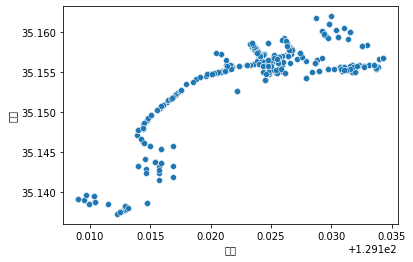

In [44]:
import seaborn as sns

sns.scatterplot(data = df_doro, x = '경도', y = '위도')

In [52]:
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 12.6 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [53]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
import requests
from urllib.parse import urlparse
from tqdm import tqdm
import json
import urllib.request
from pandas.io.json import json_normalize

In [54]:
def add_xy_points(data, x='x', y='y', buffer=500, envelope=True):
    geometry = gpd.points_from_xy(x=data[x], y=data[y])
    data = gpd.GeoDataFrame(data, geometry=geometry)  # DataFrame에 Point 추가
    data.crs = {'init':'epsg:4326'}
    data = data.to_crs({'init':'epsg:5179'})
    
    if buffer:
        if envelope==True:
            buffers = gpd.GeoSeries(data.geometry.buffer(buffer).envelope)
        else:
            buffers = gpd.GeoSeries(data.geometry.buffer(buffer))
    
        data['centroid_geometry'] = data['geometry']
        data['geometry'] = buffers
        
    return data

In [56]:
pro_points = add_xy_points(df_doro, x='경도', y='위도', buffer=50, envelope=False)
pro_points

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자,geometry,centroid_geometry
223,224,명성초장집,부산 수영구 광안해변로15번길 77 (남천동),NaN,35.139159,129.109044,2022-12-22,"POLYGON ((1146635.427 1683845.297, 1146635.186...",POINT (1146585.427 1683845.297)
266,267,써브웨이광안비치점,"부산 수영구 광안해변로 239 1층 (민락동,광안샤인빌딩)",NaN,35.154777,129.120110,2022-12-22,"POLYGON ((1147615.509 1685593.942, 1147615.268...",POINT (1147565.509 1685593.942)
369,370,와바모텔,부산 수영구 광안해변로279번길 30 (민락동),NaN,35.156747,129.125494,2022-12-22,"POLYGON ((1148102.306 1685820.348, 1148102.065...",POINT (1148052.306 1685820.348)
374,375,쉼표,"부산 수영구 광안해변로 314 B동 101호 상가 (민락동, 진로비치아파트)",NaN,35.156907,129.127592,2022-12-22,"POLYGON ((1148293.166 1685841.302, 1148292.925...",POINT (1148243.166 1685841.302)
440,441,컴포즈커피 민락점,"부산 수영구 광안해변로 311 ,1층 117호 (민락동,서희스타힐스센텀프리모)",NaN,35.157332,129.127433,2022-12-22,"POLYGON ((1148277.939 1685888.218, 1148277.698...",POINT (1148227.939 1685888.218)
...,...,...,...,...,...,...,...,...,...
126006,126007,(주)2022부산기념품10선협의회 여가 거가 광,부산 수영구 광안해변로 219 1층 (광안동),NaN,35.153774,129.118516,2022-12-22,"POLYGON ((1147472.101 1685480.240, 1147471.861...",POINT (1147422.101 1685480.240)
126123,126124,지에스(GS)25 광안리중앙점,부산 수영구 광안해변로 195 1층 (광안동),NaN,35.151743,129.116809,2022-12-22,"POLYGON ((1147320.265 1685252.514, 1147320.025...",POINT (1147270.265 1685252.514)
126153,126154,삼천포,"부산 수영구 광안해변로344번길 17-9 101호 (민락동,마린리치2 )",NaN,35.155215,129.131202,2022-12-22,"POLYGON ((1148625.032 1685658.993, 1148624.791...",POINT (1148575.032 1685658.993)
126654,126655,청사옥,"부산 수영구 광안해변로344번길 17-5 4층 401호 (민락동,마린리치)",NaN,35.155181,129.131025,2022-12-22,"POLYGON ((1148609.053 1685654.914, 1148608.812...",POINT (1148559.053 1685654.914)


In [58]:
df_doro.to_csv("/content/drive/MyDrive/data/gwang.csv")